# Практическое задание №1

ФИО: Иванов Иван Иванович

вуз: МГУ 

факультет: механико-математический

курс: 3

кафедра (если есть): МаТИС

научный руководитель (если есть): Иванов И.И.

### Задача: Оценка качества вина по его характеристикам
### Метрика качества: Accuracy

#### 1. Считывание данных (2 балла)


In [1]:
import pandas as pd 
import numpy as np

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

trainX = train[train.columns[:-1]].values
trainY = train[train.columns[-1]].values
testX = test[test.columns[:-1]].values
testY = test[test.columns[-1]].values

In [3]:
# ваш код считывания данных


print(trainX.shape, trainY.shape, testX.shape, testY.shape)

(1279, 11) (1279,) (320, 11) (320,)


In [4]:
# ваш код считывания данных


print(trainX.shape, trainY.shape, testX.shape, testY.shape)

(1279, 11) (1279,) (320, 11) (320,)


На данном шаге у вас должны быть готовы данные для обучения первой модели. 

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

baseline = KNeighborsClassifier(n_neighbors=1)
baseline.fit(trainX, trainY)
baseline_prediction = baseline.predict(testX)

print('accuracy = %.2f' % accuracy_score(testY, baseline_prediction))

accuracy = 0.53


Можно ли считать этот результат хорошим?
Какую точность можно получить используя совсем простые модели:
- случайный выбор ответа
- константная модель
?

In [6]:
np.max([(testY==x).mean() for x in np.unique(testY)])

0.409375

### Случайный выбор ответа дает точность около 0.5, максимальная точность константной модели - доля наибольшего класса в тесте (0.41), поэтому результат базовой модели не очень хороший

#### 2. Препроцессинг данных (3 балла)

Одна из причин, почему метод ближайшего соседа не даёт хороших результатов, это наличие признаков разного масштаба. 
Поэтому признаки необходимо приводить к одному и тому же диапозону значений.
Изучите раздел документации
https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
и попробуйте применить к данным все методы из раздела 4.3.1

In [7]:
from sklearn import preprocessing

In [8]:
# scaled_trainX =  preprocessing.scale(trainX)
# scaled_testX =  preprocessing.scale(testX)
scaler = preprocessing.MaxAbsScaler()
scaled_trainX = scaler.fit_transform(trainX)
scaled_testX = scaler.transform(testX)
# sc
# scaled_trainX =  preprocessing.MaxAbsScaler(trainX)
# scaled_trainX = scaled_trainX.reshape((trainX.shape[0],-1))
# scaled_testX =  preprocessing.MaxAbsScaler(testX)
# scaled_testX = scaled_testX.reshape((trainX.shape[0],-1))

In [9]:
baseline = KNeighborsClassifier(n_neighbors=1)
baseline.fit(scaled_trainX, trainY)
baseline_prediction = baseline.predict(scaled_testX)

print('accuracy = %.2f' % accuracy_score(testY, baseline_prediction))

accuracy = 0.64


#### 3. Подбор параметров для метода ближайшего соседа (5 баллов)

1.Подберите лучшие параметры для метода ближайших соседей использую 5-fold кроссвалидацию.
Изучите главы документации:
https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation
https://scikit-learn.org/stable/modules/grid_search.html#grid-search


In [10]:
def inv_sq(x):
    return 0.1/(x+0.0001)**2

In [13]:
# from sklearn.model_selection import GridSearchCV

# params = {
#     'n_neighbors':np.linspace(1,100,100).astype(int),
#     'weights':['uniform', 'distance', inv_sq],
#     'p':[1,2,3],
#     'metric':['braycurtis', 'canberra', 'chebyshev', 'correlation', 'dice', 'hamming', 'jaccard', 'kulsinski', 'mahalanobis', 'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule']
# }
# clf = KNeighborsClassifier()
# search = GridSearchCV(clf, params, cv=5)
# search.fit(trainX, trainY)
# print(search.best_params_)
# print(search.best_score_)

In [36]:
best_params = {'metric': 'canberra', 'n_neighbors': 53, 'p': 1, 'weights': inv_sq}
# best_params = search.best_params_

После подбора оптимальных параметров обучите модель с этими параметрами на всем обучающей выборке и посмотрите качество на тесте.

In [37]:
clf = KNeighborsClassifier(**best_params)
clf.fit(trainX, trainY)
print('accuracy = %.5f' % accuracy_score(testY, clf.predict(testX)))

accuracy = 0.66250


#### 4. Линейная регрессия (4 балла)

Напишите код функций для нахождения весов линейной регрессии (вспомните формулы из лекции 3), а также для применения этих весов (предсказание).

Если эти функции будут правильно реализованы, то в дальнейшем можно будет применять класс MyLinearRegression со стандартным scikit-learn интерфейсом, в котором нас интересуют два метода: fit и predict.

In [16]:
import numpy as np
from numpy.linalg import inv
def solve_linear_regression(X, y):

    A = np.hstack((np.ones((X.shape[0],1)), X))
    W = np.dot(np.dot(inv(np.dot(A.T, A)), A.T), y)
    bias = W[0]
    weights = W[1:]
    
    return weights, bias

def make_prediction(weights, bias, testX):
    
    pred = np.dot(testX, weights.T) + bias
    return pred
    

class MyLinearRegression():
    def __init__(self,):
        self.name = 'LinearRegression'
    
    def fit(self, X, Y):
        self.weights, self.bias = solve_linear_regression(X, Y)
#         return self
    
    def predict(self, X):
        return make_prediction(self.weights, self.bias, X)  

Протестируйте ваш класс на предложенном датасете

In [17]:
scaled_trainX = preprocessing.normalize(trainX)
scaled_testX = preprocessing.normalize(testX)

In [18]:
baseline = MyLinearRegression()
baseline.fit(scaled_trainX, trainY)

baseline_prediction = np.round(baseline.predict(scaled_trainX))
print("acc on train:", np.mean(baseline_prediction == trainY))
baseline_prediction = np.round(baseline.predict(scaled_testX))
print("acc on test:", np.mean(baseline_prediction == testY))

acc on train: 0.6098514464425332
acc on test: 0.553125


Сравните результаты вашего класса и аналогичного из scikit-learn
sklearn.linear_model.LinearRegression

In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(scaled_trainX, trainY)

pred = np.round(model.predict(scaled_trainX))
print("acc on train:", np.mean(pred == trainY))
pred = np.round(model.predict(scaled_testX))
print("acc on test:", np.mean(pred == testY))

acc on train: 0.6098514464425332
acc on test: 0.553125


#### 5. Лучшая модель (3 балла )


Попробуйте улучшить результат на тестовом датасете, используя все пройденные  до 15 марта  (первые 4 лекции) алгоритмы машинного обучения и любые методы препроцессинга и постпроцессинга. Если параметры не дефолтные, то  подбр параметров должен осуществлять путём кросс-валидации без привлечения тестового датасета.

### Проверим, улучшит ли результат регуляризация

In [20]:
# ваш код 
def solve_regularize_linear_regression(X, y, alpha):
    # ваш код
    A = np.hstack((np.ones((X.shape[0],1)), X))
    W = np.dot(np.dot(inv(np.dot(A.T, A) + alpha * np.eye(X.shape[1]+1)), A.T), y)
    bias = W[0]
    weights = W[1:]
    
    return weights, bias

def make_prediction(weights, bias, testX):
    #ваш код
    pred = np.dot(testX, weights.T) + bias
    return pred
    

class BestLinearRegression():
    def __init__(self,):
        self.name = 'LinearRegression'
    
    def fit(self, X, Y, alpha=0):
        self.weights, self.bias = solve_regularize_linear_regression(X, Y, alpha)
#         print(self.weights)
#         return self
    
    def predict(self, X):
        return make_prediction(self.weights, self.bias, X)  

In [21]:
# acc = {}
# for alpha in np.linspace(0,5,5):
    
#     baseline = BestLinearRegression()
#     baseline.fit(scaled_trainX, trainY, alpha)

#     baseline_prediction = np.round(baseline.predict(scaled_testX))
#     print(alpha, "acc on test:", np.mean(baseline_prediction == testY))
#     acc[alpha] = np.mean(baseline_prediction == testY)

In [22]:
from sklearn.linear_model import ElasticNet

In [23]:
baseline = ElasticNet()
baseline.fit(scaled_trainX, trainY)

baseline_prediction = np.round(baseline.predict(scaled_trainX))
print("acc on train:", np.mean(baseline_prediction == trainY))
baseline_prediction = np.round(baseline.predict(scaled_testX))
print("acc on test:", np.mean(baseline_prediction == testY))

acc on train: 0.3964034401876466
acc on test: 0.409375


#### Регуляризация не эффективна

### Посмотрим на корреляциии признаков 

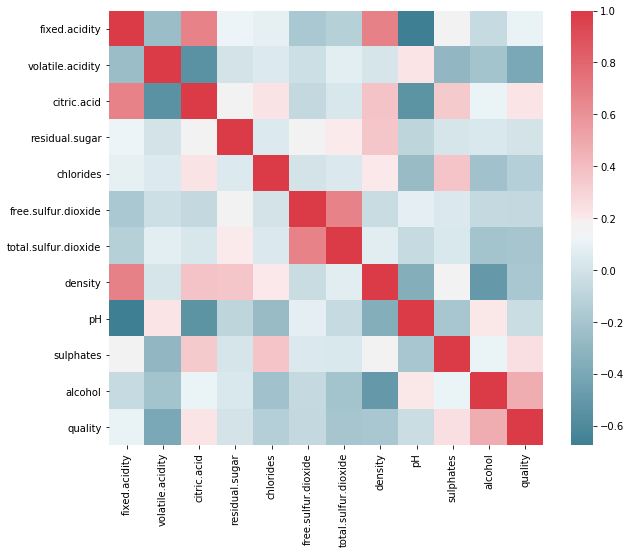

In [24]:
import seaborn as sns
from matplotlib import pyplot as plt

f, ax = plt.subplots(figsize=(10, 8))
corr = train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

### удалим признаки с наименьшим вкладом в целевую переменную

In [25]:
train_new = train.drop(['fixed.acidity', 'citric.acid'] , axis=1)
test_new = test.drop(['fixed.acidity', 'citric.acid'] , axis=1)

In [26]:
trainX = train_new[train_new.columns[:-1]].values
testX = test_new[test_new.columns[:-1]].values

scaled_trainX = preprocessing.normalize(trainX)
scaled_testX = preprocessing.normalize(testX)

In [30]:
baseline = BestLinearRegression()
baseline.fit(scaled_trainX, trainY, 0)

baseline_prediction = np.round(baseline.predict(scaled_trainX))
print("Регрессия:")
print("acc on train:", np.mean(baseline_prediction == trainY))
baseline_prediction = np.round(baseline.predict(scaled_testX))
print("acc on test:", np.mean(baseline_prediction == testY))

clf = KNeighborsClassifier(**best_params)
clf.fit(trainX, trainY)
print("KNN")
print('accuracy = %.5f' % accuracy_score(testY, clf.predict(testX)))

Регрессия:
acc on train: 0.6121970289288506
acc on test: 0.571875
KNN
accuracy = 0.66250
